### Libraries

In [3]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


# 1. Data Description

## Players Dataset

The sessions dataset contains **196 observations** and **7 variables**. The data were likely collected partially by a system which recorded players' playtime and also by a survey in which players self-reported their age, gender etc.

### players.csv Variables

| Name        | Type | Meaning                                 | Example                |
|-------------|------|-----------------------------------------|------------------------|
| experience  | chr (character) | Player's experience level out of: <br> - Amateur <br> - Beginner <br> - Regular <br> - Pro <br> - Veteran | Regular|
| subscribe | lgl (logical) | Whether the player is a subscriber (or not) <br> to a game-related a newsletter | True |
| hashedEmail | chr (character)  | Unique identifier for each player which<br>links to the sessions.csv dataset | bfce39c89d6549f2bb94d8   <br>064d3ce69dc3d7e72b38f4   <br>31d8aa0c4bf95ccee6bf |
| played_hours | dbl (double) | The total number of hours played by a player <br> rounded to the nearst 0.1 of an hour | 30.3 |
| name | chr (character) | The player's first name | Morgan |
| gender | chr (character) | The player's gender | Female |
| Age | int (integer) | The player's age in years | 21 |

### players.csv Summary

In [4]:
players <- read_csv("data/players.csv")

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [5]:
summarised_players <- players |>
                      summarize(
                          num_players = n(),
                          mean_hours_played =  mean(played_hours, na.rm = TRUE),
                          mean_age = mean(Age, na.rm = TRUE)
                      )

summarised_players

num_players,mean_hours_played,mean_age
<int>,<dbl>,<dbl>
196,5.845918,21.13918


### players.csv Issues

* Two observations contain a missing age variable
* As the age, gender, and name are likely self-reported, users (particularly children) may provide false ages to bypass parental consent or may otherwise misreport their identity.
* As gender was used rather than sex, the variable is not binary and thus harder to quantify

# 2. Questions

For this project, **I have chosen Q1** as a broad question to address: "What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?"

From this broad question, I have branched out to explore: **“Can age, played hours and experience predict subscribing in the players.csv dataset?”,**

The players.csv dataset is well-suited to addressing my question as all of its observations contains my selected explanatory variables. I picked age, hours played and experience as they relate to player characteristics and behaviours more than other variables. I will wrangle the data by converting experience into a factor since it is currently stored as a character, dropping the two observations with "NA" age, and by selecting only the variables I will be focusing on (age, experience, subscribe, and played_hours).

# 3. Exploratory Data Analysis and Visualization

*Note:* "Compute the mean value for each quantitative variable in the players.csv data set" has been completed above

## Wrangling the data

In [8]:
tidy_players <- players |>
                mutate(experience = as.factor(experience)) |>
                select(experience, subscribe, played_hours, Age) |>
                drop_na(Age)

head(tidy_players, 5)

experience,subscribe,played_hours,Age
<fct>,<lgl>,<dbl>,<dbl>
Pro,TRUE,30.3,9
Veteran,TRUE,3.8,17
Veteran,FALSE,0.0,17
Amateur,TRUE,0.7,21
Regular,TRUE,0.1,21


## Exploratory Visualisations

### Age vs Played Hours Scatter Plot

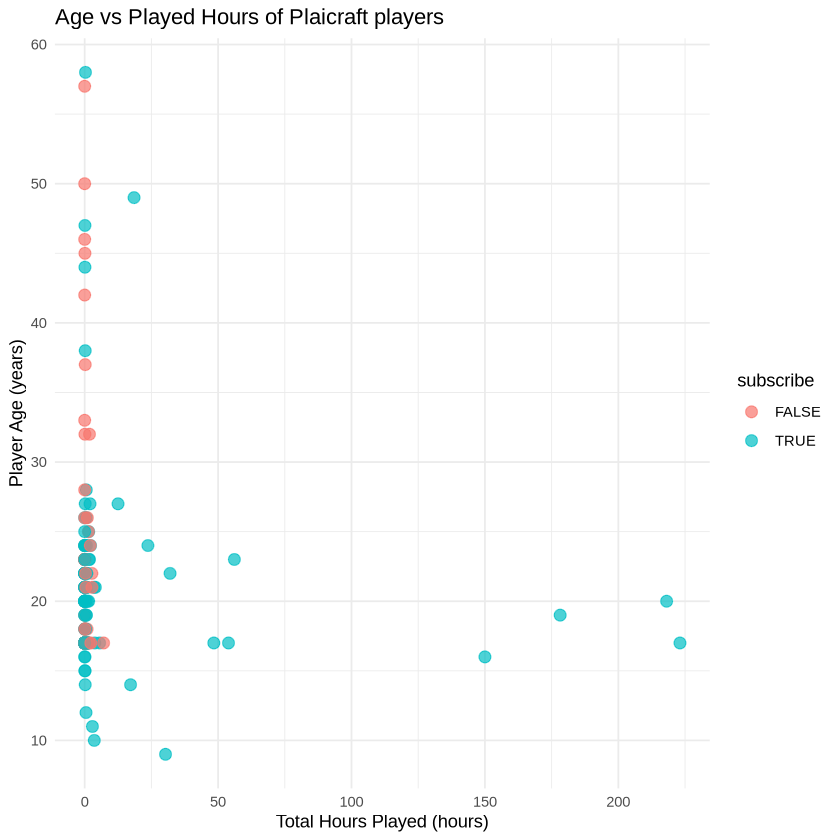

In [26]:
scatter_plot <- tidy_players |>
                ggplot(aes(x = played_hours, y = Age, colour = subscribe)) +
                geom_point(alpha = 0.7, size = 3) +
                labs(
                    title = "Age vs Played Hours of Plaicraft players",
                    x = "Total Hours Played (hours)",
                    y = "Player Age (years)"
                ) +
                theme_minimal()

scatter_plot

**Insights**
* Non-subscribed players never exceed a total playtime of 13 hours.
* Most non-subscribed players are older than 15, suggesting they are primarily adults.
* Many non-subscribed players cluster near zero total playtime, indicating minimal engagement.
* Some subscribed players have extremely high total playtimes (over 200 hours), which heavily inflates the average playtime for this group.

### Ratio of Subscribed Players per Each Experience Level Bar Plot

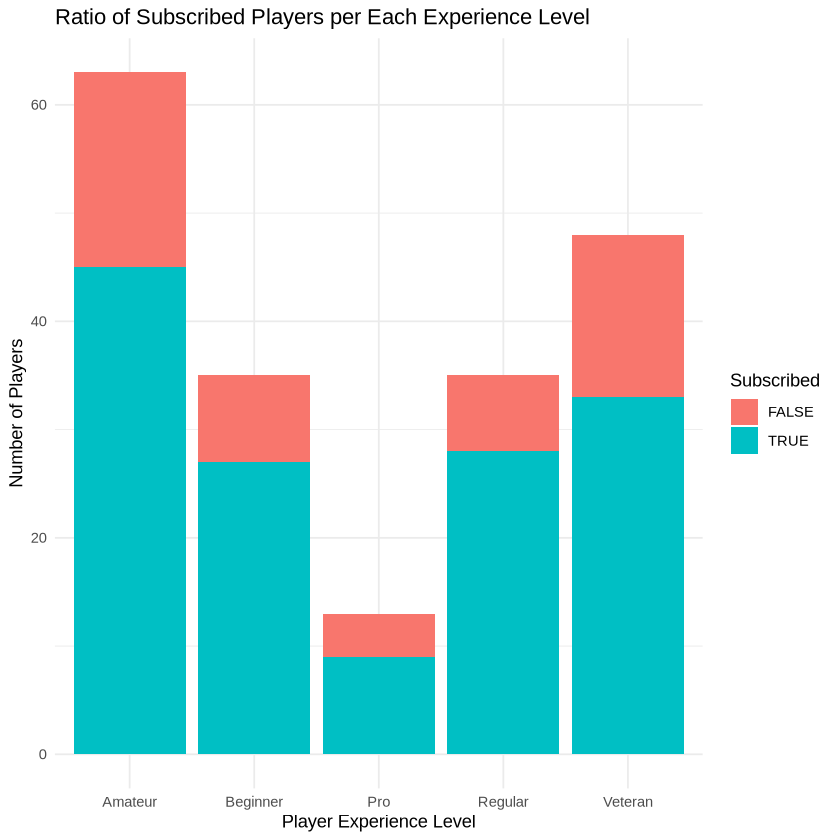

In [24]:
bar_plot_1 <- tidy_players |>
                ggplot(aes(x = experience, fill = subscribe)) +
                geom_bar() +
                labs(
                    title = "Ratio of Subscribed Players per Each Experience Level",
                    x = "Player Experience Level",
                    y = "Number of Players",
                    fill = "Subscribed"
                ) + 
                scale_y_continuous() +
                theme_minimal()

bar_plot_1

**Insights**
* Pro players seem to have the highest raio of subscribed players
* Veteran is likely the most experienced level but not the most subscribed ratio
* This suggest the relationship between experience and susbcription may be more complicated than a direct relationship between the two variables

### Average Played Hours by Subscription Status Bar Plot

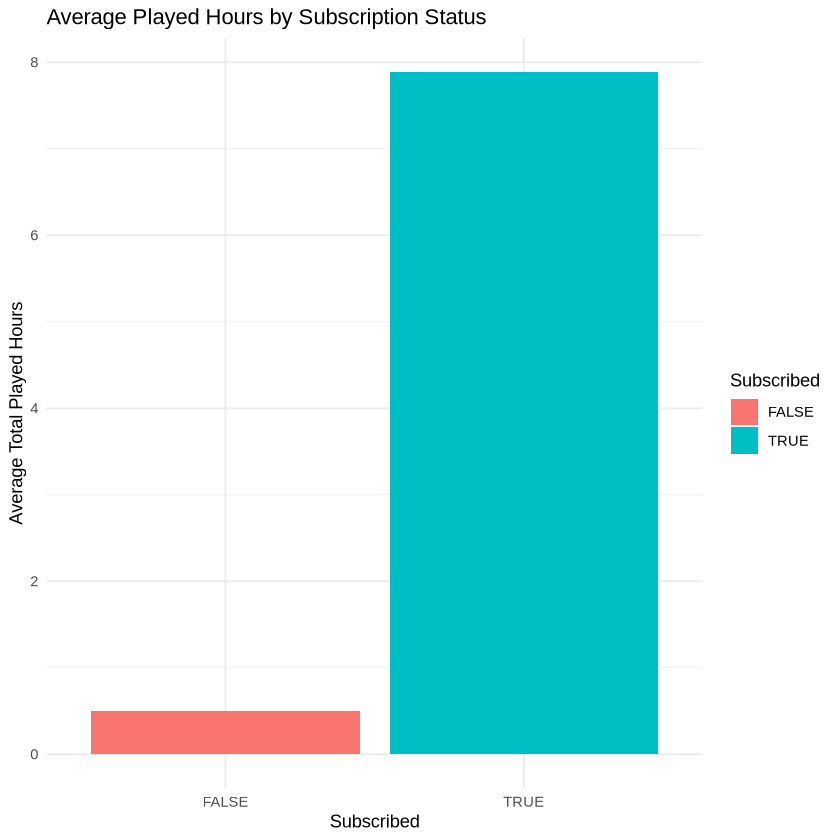

In [28]:
bar_plot_2 <- tidy_players |>
              group_by(subscribe) |>
              summarize(mean_hours_played =  mean(played_hours, na.rm = TRUE)) |>
              ggplot(aes(x = subscribe, y = mean_hours_played, fill = subscribe)) +
              geom_bar(stat = "identity") +
              labs(
                    title = "Average Played Hours by Subscription Status",
                    x = "Subscribed",
                    y = "Average Total Played Hours",
                    fill = "Subscribed"
                ) +
                theme_minimal()

bar_plot_2

**Insights**
* Subscribed players, on average, have significantlly higher total play time (> 8x) than non-subscribed players.
* The averages may be skewed as a few subscribed players with really high play times may inflate the average, while non-subscribers with little to no play time may pull the average down.
* For this project, it may be worth filtering the data to include only players with playtime greater than zero.